In [ ]:
import zipfile
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
caminho_zip = '/content/archive (2).zip'
pasta_destino = 'nutricao'

In [ ]:


caminho_zip = '/content/archive (2).zip'

if os.path.exists(caminho_zip):
    with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
        zip_ref.extractall(pasta_destino)
        print(f'Arquivos extraídos para {pasta_destino}')
else:
    print(f'Arquivo não encontrado: {caminho_zip}')


Arquivos extraídos para nutricao


In [ ]:


# Caminho para o arquivo CSV extraído
caminho_csv = '/content/nutricao/BakedFoodNutritions.csv'

# Carregar a base de dados
df = pd.read_csv(caminho_csv)

# Mostrar as primeiras linhas da base de dados
print(df.head())


       Food                   ProductType           FlavorVariant  \
0  Andrea'S  Gluten Free Soft Dinner Roll    Prepared From Recipe   
1   Archway            Home Style Cookies  Chocolate Chip Ice Box   
2   Archway            Home Style Cookies        Coconut Macaroon   
3   Archway            Home Style Cookies     Date Filled Oatmeal   
4   Archway            Home Style Cookies             Dutch Cocoa   

   Calories-kcl  Protein-g  Carb-g  Fiber-g  Sugar-g  Sodium-g  \
0           257        5.7    40.2      2.9      3.0       544   
1           497        4.3    65.0      2.0     34.1       270   
2           460        3.0    61.2      5.1     45.2       200   
3           400        4.7    68.2      2.1     34.3       331   
4           431        4.5    69.4      2.6     35.4       384   

   SaturatedFat-g  MonounsaturatedFat-g  PolyunsaturatedFat-g  TransaFat-g  \
0            4.84                  4.51                  4.37         0.49   
1            8.10               

In [ ]:
df.head(50)

,Food,ProductType,FlavorVariant,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MeasureType,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl
0,Andrea'S,Gluten Free Soft Dinner Roll,Prepared From Recipe,257,5.7,40.2,2.90,3.0,544,4.84,4.51,4.37,0.49,1.0,Roll,177,69.0,257
1,Archway,Home Style Cookies,Chocolate Chip Ice Box,497,4.3,65.0,2.00,34.1,270,8.10,8.90,1.40,5.83,1.0,Serving,119,24.0,497
2,Archway,Home Style Cookies,Coconut Macaroon,460,3.0,61.2,5.10,45.2,200,20.10,1.60,0.80,0.49,1.0,Serving,101,22.0,460
3,Archway,Home Style Cookies,Date Filled Oatmeal,400,4.7,68.2,2.10,34.3,331,2.80,4.80,1.10,3.36,1.0,Serving,100,25.0,400
4,Archway,Home Style Cookies,Dutch Cocoa,431,4.5,69.4,2.60,35.4,384,3.60,5.90,1.20,4.24,1.0,Serving,103,24.0,431
5,Archway,Home Style Cookies,Frosty Lemon,430,4.4,64.8,0.70,33.4,449,5.80,5.80,0.90,0.49,1.0,Serving,112,26.0,430
6,Archway,Home Style Cookies,Iced Molasses,420,3.5,69.1,1.00,38.4,605,4.20,4.80,2.40,3.08,1.0,Serving,118,28.0,420
7,Archway,Home Style Cookies,Iced Oatmeal,435,4.9,66.8,2.00,37.2,377,4.60,5.60,2.70,3.58,1.0,Serving,122,28.0,435
8,Archway,Home Style Cookies,Molasses,403,4.3,69.4,1.20,36.4,577,2.80,4.90,1.10,3.34,1.0,Serving,105,26.0,403
9,Archway,Home Style Cookies,Oatmeal,421,5.5,68.2,2.90,34.5,394,3.20,5.70,1.30,3.88,1.0,Serving,105,25.0,421


In [ ]:
df.describe()

,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,393.301829,6.284604,59.662805,3.334451,19.031707,501.539634,4.856921,4.518887,4.383430,0.487759,3.085564,126.065549,34.013415,393.301829
std,99.935004,3.106372,13.155921,2.951149,13.659298,554.188205,4.618037,3.244464,3.289406,0.871798,5.120313,51.332358,19.312018,99.935004
min,51.000000,0.000000,20.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,2.000000,3.000000,51.000000
25%,295.750000,4.500000,48.500000,1.600000,5.900000,320.000000,1.600000,2.100000,1.700000,0.200000,1.000000,83.000000,28.000000,295.750000
50%,416.000000,5.900000,63.500000,2.600000,19.000000,412.000000,3.600000,4.250000,3.700000,0.360000,1.000000,127.000000,29.000000,416.000000
75%,476.000000,8.000000,70.000000,3.500000,31.200000,580.500000,6.100000,6.000000,6.400000,0.490000,3.000000,154.000000,34.000000,476.000000
max,562.000000,40.400000,87.700000,26.900000,57.400000,10600.000000,24.700000,21.600000,16.600000,9.400000,30.000000,260.000000,182.000000,562.000000


In [ ]:
df.count()

,0
Food,656
ProductType,656
FlavorVariant,656
Calories-kcl,656
Protein-g,656
Carb-g,656
Fiber-g,656
Sugar-g,656
Sodium-g,656
SaturatedFat-g,656


In [ ]:
df.columns

Index(['Food', 'ProductType', 'FlavorVariant', 'Calories-kcl', 'Protein-g',
       'Carb-g', 'Fiber-g', 'Sugar-g', 'Sodium-g', 'SaturatedFat-g',
       'MonounsaturatedFat-g', 'PolyunsaturatedFat-g', 'TransaFat-g',
       'MeasureQuantity', 'MeasureType', 'MQCalories-kcl', 'MQGmWt',
       'MQCalories100gm-kcl'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food                  656 non-null    object 
 1   ProductType           656 non-null    object 
 2   FlavorVariant         656 non-null    object 
 3   Calories-kcl          656 non-null    int64  
 4   Protein-g             656 non-null    float64
 5   Carb-g                656 non-null    float64
 6   Fiber-g               656 non-null    float64
 7   Sugar-g               656 non-null    float64
 8   Sodium-g              656 non-null    int64  
 9   SaturatedFat-g        656 non-null    float64
 10  MonounsaturatedFat-g  656 non-null    float64
 11  PolyunsaturatedFat-g  656 non-null    float64
 12  TransaFat-g           656 non-null    float64
 13  MeasureQuantity       656 non-null    float64
 14  MeasureType           656 non-null    object 
 15  MQCalories-kcl        6

In [ ]:
df['ProductType'].unique()

array(['Gluten Free Soft Dinner Roll', 'Home Style Cookies',
       'Blueberry Muffin Mix', 'Cheddar Cheese Crackers',
       'Chocolatey Peanut Butter Crackers', 'Grilled Cheese Crackers',
       'Pb & J Crackers', 'Peanut Butter Crackers', 'Cinnamon-Raisin',
       'Egg', 'Oat Bran', 'Wheat', 'Winter Mints Cookies',
       'Double Chocolate Cookies', 'Fruit & Nut Cookies', 'Mixed Grain',
       'Plain Or Buttermilk', 'Boston Brown', 'Chapati Or Roti', 'Cheese',
       'Cornbread', 'Cracked-Wheat', 'French Or Vienna', 'Gluten-Free',
       'Irish Soda', 'Italian', 'Oatmeal', 'Pita', 'Potato', 'Protein',
       'Pumpernickel', 'Reduced-Calorie', 'Rice Bran', 'Wheat Bran',
       'Wheat Germ', 'White Wheat', 'White', 'Whole-Wheat', 'Low Fat',
       'Fruitcake', 'Gingerbread', 'Pineapple Upside-Down', 'Pound',
       'Shortcake', 'Snack Cakes', 'Yellow', 'Prepared From Mix',
       'Frosted', 'Butter Or Sugar', 'Chocolate',
       'With Peanut Butter Filling', 'Brownies', 'Butter',
    

In [ ]:
df['ProductType'].value_counts()

,count
ProductType,
Keebler,119
Kellogg'S,63
Murray,32
Pie,26
Pepperidge Farm,25
...,...
Pound,1
Pineapple Upside-Down,1
Gingerbread,1


In [ ]:
df['ProductType'] = df['ProductType'].apply(lambda x : 0 if x == 'Home Style Cookies' else 1)
df['ProductType'] = df['ProductType'].apply(lambda x : 0 if x == '0' else 1)

In [ ]:
df.head()

,Food,ProductType,FlavorVariant,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MeasureType,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl
0,Andrea'S,1,Prepared From Recipe,257,5.7,40.2,2.9,3.0,544,4.84,4.51,4.37,0.49,1.0,Roll,177,69.0,257
1,Archway,1,Chocolate Chip Ice Box,497,4.3,65.0,2.0,34.1,270,8.10,8.90,1.40,5.83,1.0,Serving,119,24.0,497
2,Archway,1,Coconut Macaroon,460,3.0,61.2,5.1,45.2,200,20.10,1.60,0.80,0.49,1.0,Serving,101,22.0,460
3,Archway,1,Date Filled Oatmeal,400,4.7,68.2,2.1,34.3,331,2.80,4.80,1.10,3.36,1.0,Serving,100,25.0,400
4,Archway,1,Dutch Cocoa,431,4.5,69.4,2.6,35.4,384,3.60,5.90,1.20,4.24,1.0,Serving,103,24.0,431


In [ ]:
df1 = df[df['ProductType'] == 1]

In [ ]:
df1.head(20)

,ProductType,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MQCalories100gm-kcl
0,1,257,5.7,40.2,2.90,3.0,544,4.84,4.51,4.37,0.49,1.0,257
1,1,497,4.3,65.0,2.00,34.1,270,8.10,8.90,1.40,5.83,1.0,497
2,1,460,3.0,61.2,5.10,45.2,200,20.10,1.60,0.80,0.49,1.0,460
3,1,400,4.7,68.2,2.10,34.3,331,2.80,4.80,1.10,3.36,1.0,400
4,1,431,4.5,69.4,2.60,35.4,384,3.60,5.90,1.20,4.24,1.0,431
5,1,430,4.4,64.8,0.70,33.4,449,5.80,5.80,0.90,0.49,1.0,430
6,1,420,3.5,69.1,1.00,38.4,605,4.20,4.80,2.40,3.08,1.0,420
7,1,435,4.9,66.8,2.00,37.2,377,4.60,5.60,2.70,3.58,1.0,435
8,1,403,4.3,69.4,1.20,36.4,577,2.80,4.90,1.10,3.34,1.0,403
9,1,421,5.5,68.2,2.90,34.5,394,3.20,5.70,1.30,3.88,1.0,421


In [ ]:
df1 = df[df['ProductType'] == 1]

In [ ]:
df1.head()

,Food,ProductType,FlavorVariant,Calories-kcl,Protein-g,Carb-g,Fiber-g,Sugar-g,Sodium-g,SaturatedFat-g,MonounsaturatedFat-g,PolyunsaturatedFat-g,TransaFat-g,MeasureQuantity,MeasureType,MQCalories-kcl,MQGmWt,MQCalories100gm-kcl
0,Andrea'S,1,Prepared From Recipe,257,5.7,40.2,2.9,3.0,544,4.84,4.51,4.37,0.49,1.0,Roll,177,69.0,257
1,Archway,1,Chocolate Chip Ice Box,497,4.3,65.0,2.0,34.1,270,8.10,8.90,1.40,5.83,1.0,Serving,119,24.0,497
2,Archway,1,Coconut Macaroon,460,3.0,61.2,5.1,45.2,200,20.10,1.60,0.80,0.49,1.0,Serving,101,22.0,460
3,Archway,1,Date Filled Oatmeal,400,4.7,68.2,2.1,34.3,331,2.80,4.80,1.10,3.36,1.0,Serving,100,25.0,400
4,Archway,1,Dutch Cocoa,431,4.5,69.4,2.6,35.4,384,3.60,5.90,1.20,4.24,1.0,Serving,103,24.0,431


In [ ]:
df2 = df.drop(['Food', 'FlavorVariant','MeasureType','MQCalories-kcl','MQGmWt','Carb-g','Fiber-g','Sugar-g','Sodium-g','SaturatedFat-g','MonounsaturatedFat-g','PolyunsaturatedFat-g','TransaFat-g','MeasureQuantity','ProductType','MQCalories100gm-kcl'], axis=1)

In [ ]:
df2.head()

,Calories-kcl,Protein-g
0,257,5.7
1,497,4.3
2,460,3.0
3,400,4.7
4,431,4.5


from matplotlib import pyplot as plt
_df_0['Calories-kcl'].plot(kind='hist', bins=20, title='Calories-kcl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Protein-g'].plot(kind='hist', bins=20, title='Protein-g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Calories-kcl', y='Protein-g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Calories-kcl'].plot(kind='line', figsize=(8, 4), title='Calories-kcl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Protein-g'].plot(kind='line', figsize=(8, 4), title='Protein-g')
plt.gca().spines[['top', 'right']].set_visible(False)

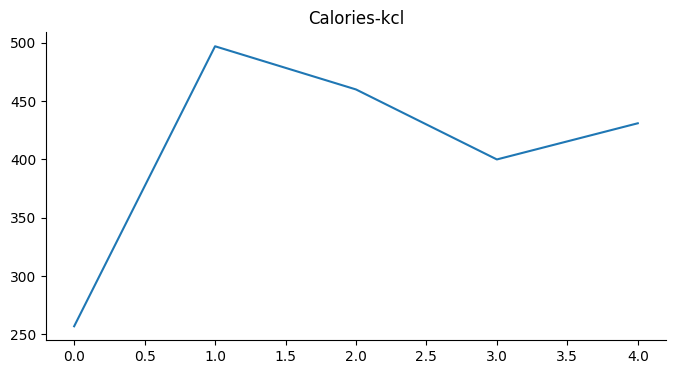

In [ ]:
from matplotlib import pyplot as plt
_df_3['Calories-kcl'].plot(kind='line', figsize=(8, 4), title='Calories-kcl')
plt.gca().spines[['top', 'right']].set_visible(False)

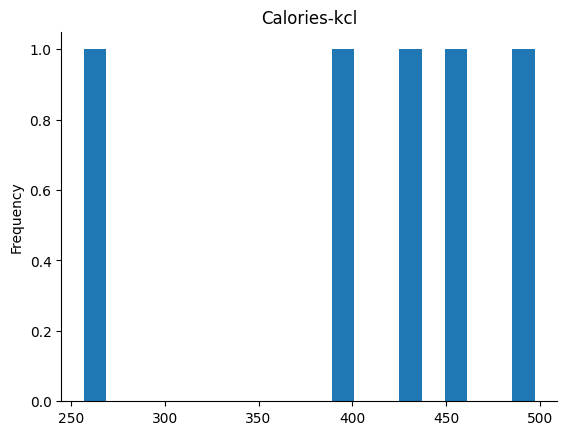

In [ ]:
from matplotlib import pyplot as plt
_df_0['Calories-kcl'].plot(kind='hist', bins=20, title='Calories-kcl')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Função MixUp para gerar mais instâncias
def mixup(X, y, alpha=0.2, n_samples=2):
    X_mix = []
    y_mix = []

    for _ in range(n_samples):
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        lam = np.random.beta(alpha, alpha)

        X_mixed = lam * X + (1 - lam) * X_shuffled
        y_mixed = lam * y + (1 - lam) * y_shuffled

        X_mix.append(X_mixed)
        y_mix.append(y_mixed)

    return np.vstack(X_mix), np.hstack(y_mix)

In [ ]:
# Criando X com as colunas de características
X_final = df2[['Calories-kcl', 'Protein-g']].values

# Se ainda não tem y, podemos gerar algo (exemplo de classificação: alta ou baixa proteína)
y_final = (df2['Protein-g'] > 4.0).astype(int).values


In [ ]:
X_mix = []
y_mix = []

# Para cada grupo de qualidade único
for quality in np.unique(y_final):
    X_group = X_final[y_final == quality]
    y_group = y_final[y_final == quality]

    # Aplicar MixUp no grupo
    X_mixed, y_mixed = mixup(X_group, y_group)

    # Adicionar os dados mixados à lista
    X_mix.append(X_mixed)
    y_mix.append(y_mixed)

# Combinar as amostras mixadas de volta em um único conjunto de dados
X_combined = np.vstack(X_mix) if X_mix else np.array([])
y_combined = np.hstack(y_mix) if y_mix else np.array([])


In [ ]:
# Simulando o DataFrame
data = {'Calories-kcl': [257, 497, 460, 400, 431],
        'Protein-g': [5.7, 4.3, 3.0, 4.7, 4.5]}
df2 = pd.DataFrame(data)

# Definindo X (Calorias) e y (Proteínas)
X = df2[['Calories-kcl']]
y = df2['Protein-g']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

In [ ]:
# Mostrando os coeficientes
print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)

# Avaliação do modelo
print("Score do modelo (R²):", model.score(X_test, y_test))


Coeficiente: -0.010803813594148106
Intercepto: 8.656075860935317
Score do modelo (R²): nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


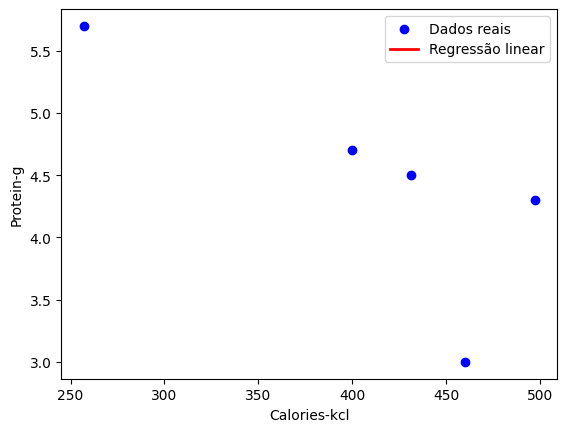

In [ ]:
# Visualização da regressão
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão linear')
plt.xlabel('Calories-kcl')
plt.ylabel('Protein-g')
plt.legend()
plt.show()